In [303]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
from rasterstats import zonal_stats

In [304]:
# First, let's check our directory 
import os
print(os.getcwd())

C:\Users\M533\Assignment


In [305]:
#Open the .tif which contains the NDVI calculation with rasterio from Part 2
ndvi_path="Data_files/clipped1_ndvi.tif"
ndvi=rio.open(ndvi_path)

#load the join shapefile from Part 1
join_path = 'Data_files/joined_with_area.shp'
join = gpd.read_file(join_path)

#Make our projected overlay vector the same CRS as the imagery
temp = join.to_crs(crs=ndvi.crs.data)

#Define the parameters to calculate the zonal statistics
array = ndvi.read(1)
affine = ndvi.transform
zs_ndvi = zonal_stats(temp, array, affine=affine, stats=['mean', 'min', 'max', 'std'])

#Append the results to a pandas' dataframe
ndviframe = pd.DataFrame(zs_ndvi)

# Specify suffixes for overlapping columns
suffixes = "_ndvi"
join = join.join(ndviframe.add_suffix(suffixes))
join.to_file("Data_files/ZonalStatsNDVI_Polygons.geojson", driver='GeoJSON')

join

,CODICE,DESC_,Plot_ha,index_righ,R_LEGISL,NAME,CODEAP,decree,Publ,Area_ha,management,CLASS,int_ha,geometry,min_ndvi,max_ndvi,mean_ndvi,std_ndvi
0,221,vineyards,0.395399,NaN,None,None,None,None,None,NaN,None,None,0.000000,"POLYGON Z ((647468.894 4520416.843 0.000, 6474...",0.208026,0.220859,0.210593,0.005133
1,221,vineyards,0.507260,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,Parchi nazionali e riserve naturali statali,0.507260,"POLYGON Z ((640443.620 4528059.830 0.000, 6404...",0.150685,0.163294,0.154288,0.005696
2,221,vineyards,0.451273,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,Parchi nazionali e riserve naturali statali,0.446702,"POLYGON Z ((644611.482 4519606.510 0.000, 6445...",0.446142,0.459969,0.448447,0.005153
3,222,orchards and minor fruits,4.685679,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,Parchi nazionali e riserve naturali statali,4.685679,"POLYGON Z ((646206.803 4523193.705 0.000, 6462...",0.166905,0.213231,0.188072,0.022651
4,222,orchards and minor fruits,0.335897,NaN,None,None,None,None,None,NaN,None,None,0.000000,MULTIPOLYGON Z (((647587.885 4524979.883 0.000...,0.152702,0.161157,0.156930,0.004227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,223,olive groves,0.782830,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,Parchi nazionali e riserve naturali statali,0.782830,"POLYGON Z ((647515.137 4524117.667 0.000, 6475...",0.167610,0.167610,0.167610,0.000000
1185,2111,simple arable land in non-irrigated areas,0.564242,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,Parchi nazionali e riserve naturali statali,0.564242,"POLYGON Z ((645733.672 4525013.677 0.000, 6457...",0.174512,0.245799,0.210155,0.035643
1186,2111,simple arable land in non-irrigated areas,17.493416,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,Parchi nazionali e riserve naturali statali,17.493416,"POLYGON Z ((642604.765 4521265.645 0.000, 6426...",0.236133,0.498710,0.327790,0.086259
1187,2111,simple arable land in non-irrigated areas,0.897249,NaN,None,None,None,None,None,NaN,None,None,0.000000,"POLYGON Z ((631900.029 4522866.652 0.000, 6319...",0.510847,0.527298,0.522363,0.007539


Text(0.5, 1.0, 'Mean NDVI by Agricultural Plot')

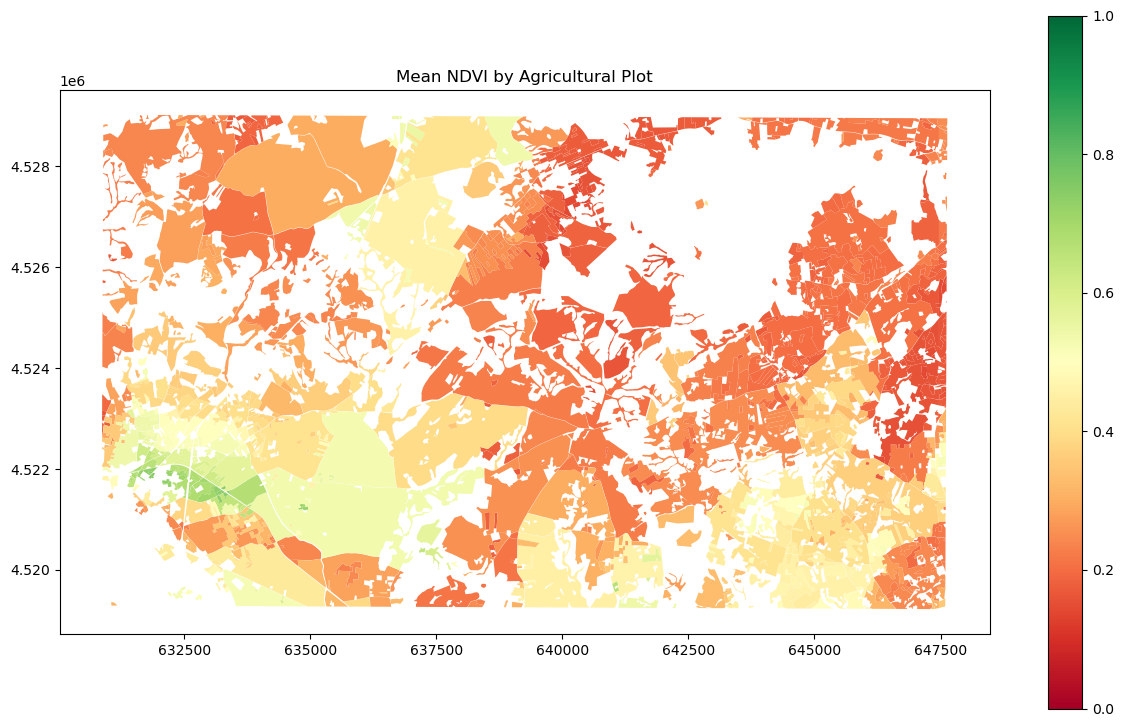

In [308]:
# Now, we can visualise the agricultural plots by mean_ndvi values
meanmap = join.plot(column='mean_ndvi', cmap =    
                                'RdYlGn', vmin=0, vmax=1, figsize=(15,9), legend =  
                                  True);
plt.title("Mean NDVI by Agricultural Plot")

In [366]:
from rasterio.mask import mask

# Open the raster file which contains the habitat connectivity calculation with rasterio
hab_con_path="Data_files/habconmap"

# Load the habitat connectivity raster
with rio.open(hab_con_path) as habcon_src:
    habcon_data = habcon_src.read(1)
    habcon_transform = habcon_src.transform

    # Load the search area polygon
    AOI_path = 'Data_files/Area_of_interest.shp'
    AOI = gpd.read_file(AOI_path)

    # Clip the NDVI data to the search area
    clipped_habcon_data, clipped_habcon_transform = mask(habcon_src, shapes=AOI.geometry, crop=True)

    # Define the output path for the clipped NDVI raster file
    clipped_habcon_path = 'Data_files/clipped_habcon1.tif'
    with rio.open(clipped_habcon_path, 'w', **habcon_src.meta) as clipped_habcon_dst:
        clipped_habcon_dst.write(clipped_habcon_data)

    print(f"Clipped NDVI saved to {clipped_habcon_path}")

Clipped NDVI saved to Data_files/clipped_habcon1.tif


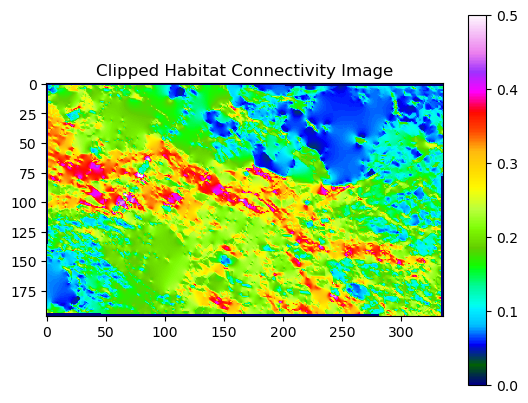

In [365]:
# Plot the clipped habitat connectivity
plt.imshow(clipped_habcon_data[0], cmap='gist_ncar', vmin=0, vmax=0.5)
plt.colorbar()
plt.title('Clipped Habitat Connectivity Image')
plt.show()

In [317]:
# Open the raster file which contains the habitat connectivity calculation with rasterio
hab_con_path = 'Data_files/clipped_habcon.tif'
hab_con = rio.open(hab_con_path)

# Load the join shapefile
lastjoin_path = "Data_files/ZonalStatsNDVI_Polygons.geojson"
lastjoin = gpd.read_file(lastjoin_path)

# Define the parameters to calculate the zonal stats
array = hab_con.read(1)
affine = hab_con.transform
zs_hab_con = zonal_stats(lastjoin, array, affine=affine, stats=["mean", "min", "max", "std"])

# Append the results to a pandas' dataframe
hab_con_frame = pd.DataFrame(zs_hab_con)

# Specify suffixes for overlapping columns
suffixes = "_hab"
lastjoin = lastjoin.join(hab_con_frame.add_suffix(suffixes))

# Save the file
lastjoin.to_file("Data_files/ZonalStatsNDVI_habitatconnectivity.geojson", driver='GeoJSON')

In [318]:
lastjoin_path = "Data_files/ZonalStatsNDVI_habitatconnectivity.geojson"
lastjoin = gpd.read_file(lastjoin_path)
lastjoin.head()

,CODICE,DESC_,Plot_ha,index_righ,R_LEGISL,NAME,CODEAP,decree,Publ,Area_ha,...,int_ha,min_ndvi,max_ndvi,mean_ndvi,std_ndvi,min_hab,max_hab,mean_hab,std_hab,geometry
0,221,vineyards,0.395399,NaN,None,None,None,None,None,NaN,...,0.000000,0.208026,0.220859,0.210593,0.005133,0.245051,0.245051,0.245051,0.000000e+00,"POLYGON Z ((647468.894 4520416.843 0.000, 6474..."
1,221,vineyards,0.507260,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,...,0.507260,0.150685,0.163294,0.154288,0.005696,0.257080,0.257080,0.257080,0.000000e+00,"POLYGON Z ((640443.620 4528059.830 0.000, 6404..."
2,221,vineyards,0.451273,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,...,0.446702,0.446142,0.459969,0.448447,0.005153,0.222153,0.222153,0.222153,0.000000e+00,"POLYGON Z ((644611.482 4519606.510 0.000, 6445..."
3,222,orchards and minor fruits,4.685679,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,...,4.685679,0.166905,0.213231,0.188072,0.022651,0.334193,0.334193,0.334193,1.324548e-08,"POLYGON Z ((646206.803 4523193.705 0.000, 6462..."
4,222,orchards and minor fruits,0.335897,NaN,None,None,None,None,None,NaN,...,0.000000,0.152702,0.161157,0.156930,0.004227,0.253226,0.253226,0.253226,0.000000e+00,MULTIPOLYGON Z (((647587.885 4524979.883 0.000...


Text(0.5, 1.0, 'Mean Habitat Connectivity by Agricultural Plot')

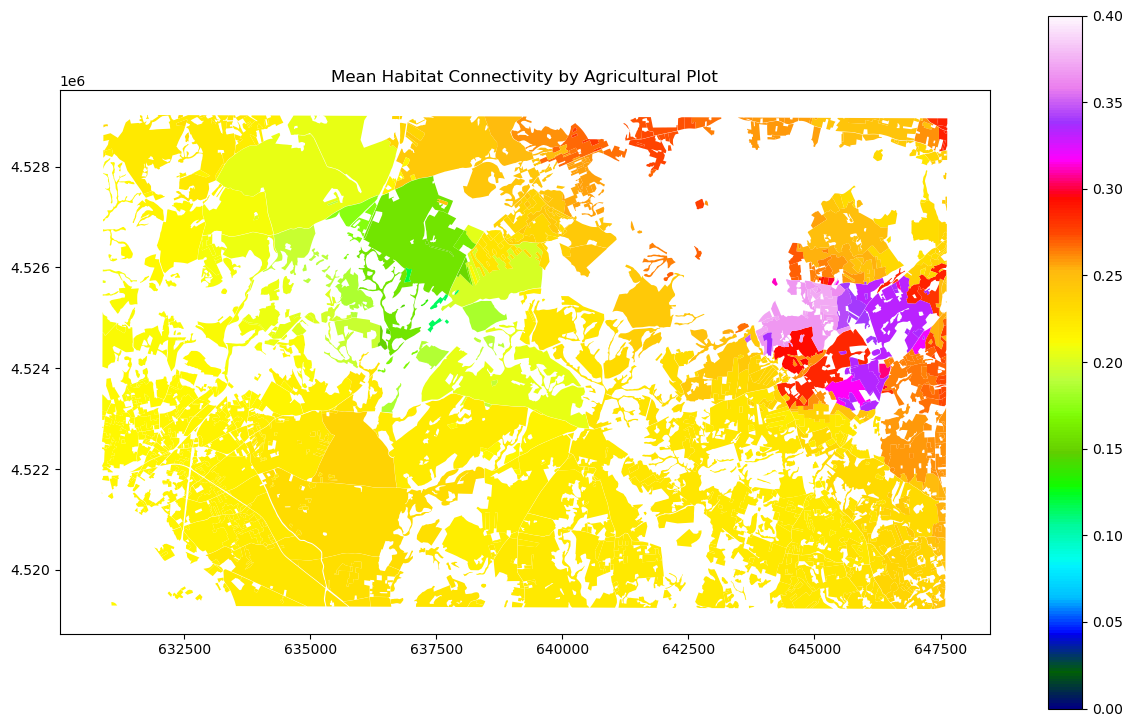

In [337]:
# Now, we can visualise the agricultural plots by mean habitat connectivity values
meanmap = lastjoin.plot(column='mean_hab', cmap =    
                                'gist_ncar', vmin=0, vmax=0.4, figsize=(15,9), legend =  
                                  True);
plt.title("Mean Habitat Connectivity by Agricultural Plot")

In [341]:
# our new GeoDataFrame now contains enough data to perform some statistical analysis
# let's start by calculating the mean ndvi per management type
lastjoin.groupby('DESC_')['mean_ndvi'].mean()

DESC_
areas mainly occupied by agricultural crops with the presence of natural spaces    0.280322
complex cultivation and parcel systems                                             0.381019
olive groves                                                                       0.329106
orchards and minor fruits                                                          0.284931
other permanent crops                                                              0.372236
simple arable land in non-irrigated areas                                          0.333650
surfaces with dense herbaceous cover                                               0.270325
temporary crops associated with permanent crops                                    0.404410
vineyards                                                                          0.389363
Name: mean_ndvi, dtype: float64

In [188]:
# let's also calculate the mean habitat connectivity per management type
lastjoin.groupby('DESC_')['mean_hab'].mean()

DESC_
areas mainly occupied by agricultural crops with the presence of natural spaces           1.405867
complex cultivation and parcel systems                                                    0.639311
horticultural crops in open fields in greenhouses and under plastic in irrigated areas         NaN
olive groves                                                                              0.775382
orchards and minor fruits                                                                 0.518437
simple arable land in non-irrigated areas                                                 1.057756
surfaces with dense herbaceous cover                                                           NaN
temporary crops associated with permanent crops                                           0.599968
vineyards                                                                                 6.959869
Name: mean_hab, dtype: float64

In [342]:
# we can also calculate statistical correlations between variables
# let's calculate the correlation between NDVI and habitat connectivity
correlation = lastjoin['mean_ndvi'].corr(lastjoin['mean_hab'])
print(f"Pearson's correlation coefficient: {correlation:.2f}")

spearman_corr = lastjoin['mean_ndvi'].corr(lastjoin['mean_hab'], method='spearman')
print(f"Spearman's rank correlation coefficient: {spearman_corr:.2f}")

Pearson's correlation coefficient: -0.34
Spearman's rank correlation coefficient: -0.48


In [343]:
# we can also calculate the statistical correlation for each group
correlation_by_group = lastjoin.groupby('DESC_').apply(lambda group: group['mean_ndvi'].corr(group['mean_hab']))

# Print the results
print("Correlation by group:")
print(correlation_by_group)

Correlation by group:
DESC_
areas mainly occupied by agricultural crops with the presence of natural spaces         NaN
complex cultivation and parcel systems                                             0.410056
olive groves                                                                      -0.357810
orchards and minor fruits                                                         -0.408836
other permanent crops                                                             -1.000000
simple arable land in non-irrigated areas                                         -0.300385
surfaces with dense herbaceous cover                                              -0.275958
temporary crops associated with permanent crops                                    0.094095
vineyards                                                                         -0.520836
dtype: float64


C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\M533\AppData\Local\Temp\ipykernel_35332\122080831.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_group = lastjoin.groupby('DESC_').apply(lambda gro

In [344]:
# we can also calculate the correlation between the intersection area with PAs and habitat connectivity
correlation = lastjoin['int_ha'].corr(lastjoin['mean_hab'])
print(f"Pearson's correlation coefficient: {correlation:.2f}")

spearman_corr = lastjoin['int_ha'].corr(lastjoin['mean_hab'], method='spearman')
print(f"Spearman's rank correlation coefficient: {spearman_corr:.2f}")

Pearson's correlation coefficient: 0.05
Spearman's rank correlation coefficient: 0.38


In [345]:
# and also be can calculate the above for each management type
correlation_by_group = lastjoin.groupby('DESC_').apply(lambda group: group['int_ha'].corr(group['mean_hab']))

# Print the results
print("Correlation by group:")
print(correlation_by_group)

Correlation by group:
DESC_
areas mainly occupied by agricultural crops with the presence of natural spaces         NaN
complex cultivation and parcel systems                                            -0.752823
olive groves                                                                       0.126845
orchards and minor fruits                                                          0.185261
other permanent crops                                                             -1.000000
simple arable land in non-irrigated areas                                          0.042155
surfaces with dense herbaceous cover                                                    NaN
temporary crops associated with permanent crops                                   -0.246334
vineyards                                                                          0.441532
dtype: float64


C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\M533\AppData\Local\Temp\ipykernel_35332\45791003.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns

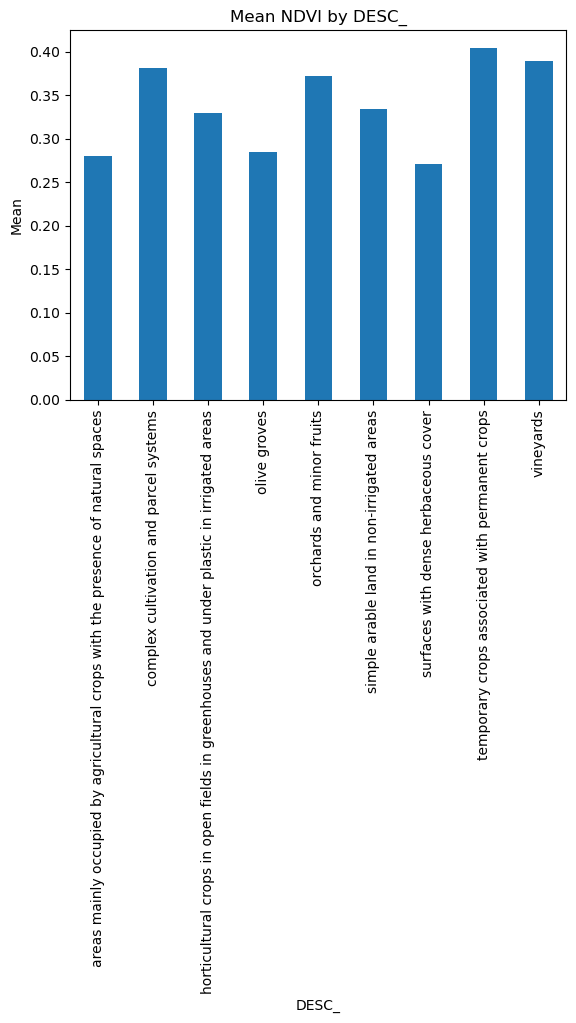

In [347]:
# Group by 'DESC_' and calculate the mean
NDVI_DESC = lastjoin.groupby('DESC_')['mean_ndvi'].mean()
# Create a bar chart
NDVI_DESC.plot(kind='bar', rot=0)
plt.xlabel('DESC_')
plt.ylabel('Mean')
plt.title('Mean NDVI by DESC_')
#Set x-axis tick labels using the mapping
plt.xticks(range(len(grouped)), [label_to_name[i] for i in range(len(grouped))], rotation=90)
plt.show()

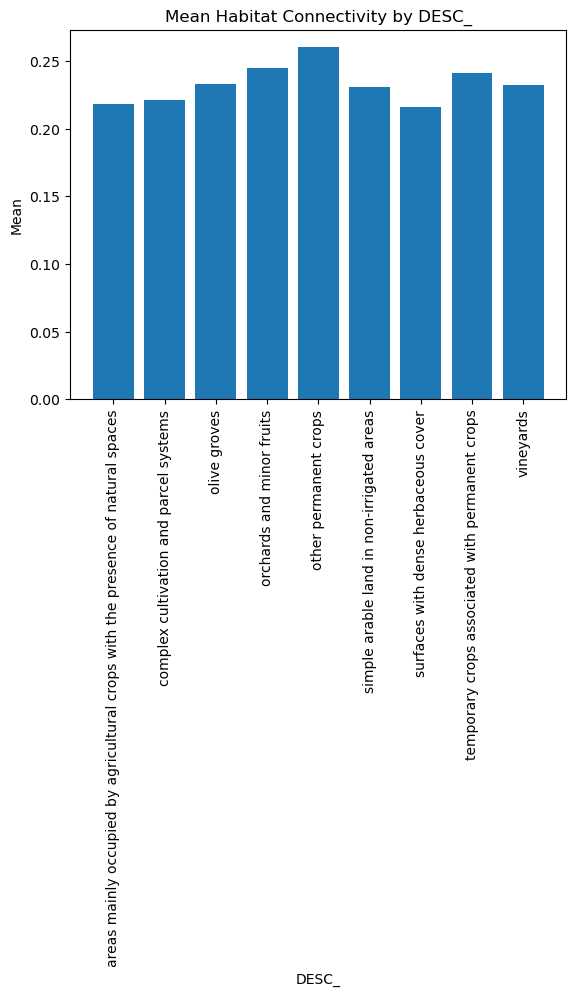

In [349]:
# Group by 'DESC_' and calculate the mean
grouped = lastjoin.groupby('DESC_')['mean_hab'].mean()

# Create a mapping between numerical labels and actual names
label_to_name = {i: name for i, name in enumerate(grouped.index)}

# Create a bar chart
plt.bar(range(len(grouped)), grouped.values)
plt.xlabel('DESC_')
plt.ylabel('Mean')
plt.title('Mean Habitat Connectivity by DESC_')
#Set x-axis tick labels using the mapping
plt.xticks(range(len(grouped)), [label_to_name[i] for i in range(len(grouped))], rotation=90)
plt.show()


In [355]:
# Calculate Pearson's correlation coefficient for each group
correlation_by_group = lastjoin.groupby('DESC_').apply(lambda group: group['Plot_ha'].corr(group['mean_ndvi']))

# Print the results
print("Correlation by group:")
print(correlation_by_group)

Correlation by group:
DESC_
areas mainly occupied by agricultural crops with the presence of natural spaces         NaN
complex cultivation and parcel systems                                             0.403299
olive groves                                                                      -0.056405
orchards and minor fruits                                                         -0.112199
other permanent crops                                                              1.000000
simple arable land in non-irrigated areas                                         -0.001004
surfaces with dense herbaceous cover                                               0.044633
temporary crops associated with permanent crops                                   -0.322226
vineyards                                                                          0.247504
dtype: float64


C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\M533\anaconda3\envs\Assignment\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\M533\AppData\Local\Temp\ipykernel_35332\7451662.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_group = lastjoin.groupby('DESC_').apply(lambda group

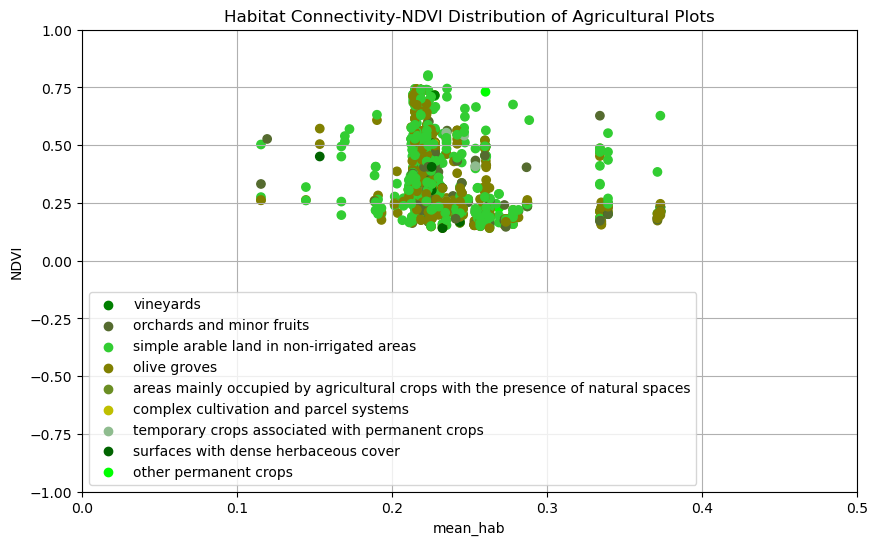

In [357]:
# Create a color map for management types
management_colors = {
    'vineyards': 'green',
    'orchards and minor fruits': 'darkolivegreen',
    'simple arable land in non-irrigated areas': 'limegreen',
    'olive groves': 'olive',
    'areas mainly occupied by agricultural crops with the presence of natural spaces': 'olivedrab',
    'complex cultivation and parcel systems': 'y',
    'temporary crops associated with permanent crops': 'darkseagreen',
    'surfaces with dense herbaceous cover': 'darkgreen',
    'other permanent crops': 'lime'
    # Add more management types and corresponding colors as needed
}

# Map management types to colors
lastjoin['Color'] = lastjoin['DESC_'].map(management_colors)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lastjoin['max_hab'], lastjoin['max_ndvi'], c=lastjoin['Color'])

# Customize plot
plt.xlabel('mean_hab')
plt.ylabel('NDVI')
plt.title('Habitat Connectivity-NDVI Distribution of Agricultural Plots')

#Create a custom legend based on management types
for DESC_, color in management_colors.items():
    plt.scatter([], [], c=color, label=DESC_)  # Empty scatter points for legend

plt.legend()
plt.xlim(0, 0.5)
plt.ylim(-1,1)
plt.grid(True)
plt.show()

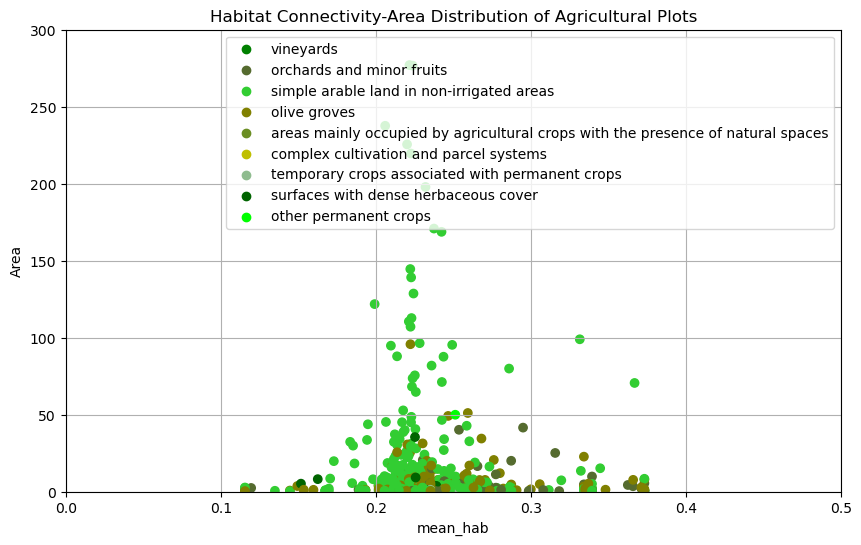

In [360]:
# Create a color map for management types
management_colors = {
    'vineyards': 'green',
    'orchards and minor fruits': 'darkolivegreen',
    'simple arable land in non-irrigated areas': 'limegreen',
    'olive groves': 'olive',
    'areas mainly occupied by agricultural crops with the presence of natural spaces': 'olivedrab',
    'complex cultivation and parcel systems': 'y',
    'temporary crops associated with permanent crops': 'darkseagreen',
    'surfaces with dense herbaceous cover': 'darkgreen',
    'other permanent crops': 'lime'
    # Add more management types and corresponding colors as needed
}

# Map management types to colors
lastjoin['Color'] = lastjoin['DESC_'].map(management_colors)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lastjoin['mean_hab'], lastjoin['Plot_ha'], c=lastjoin['Color'])

# Customize plot
plt.xlabel('mean_hab')
plt.ylabel('Area')
plt.title('Habitat Connectivity-Area Distribution of Agricultural Plots')

#Create a custom legend based on management types
for DESC_, color in management_colors.items():
    plt.scatter([], [], c=color, label=DESC_)  # Empty scatter points for legend

plt.legend()
plt.xlim(0, 0.5)
plt.ylim(0,300)
plt.grid(True)
plt.show()

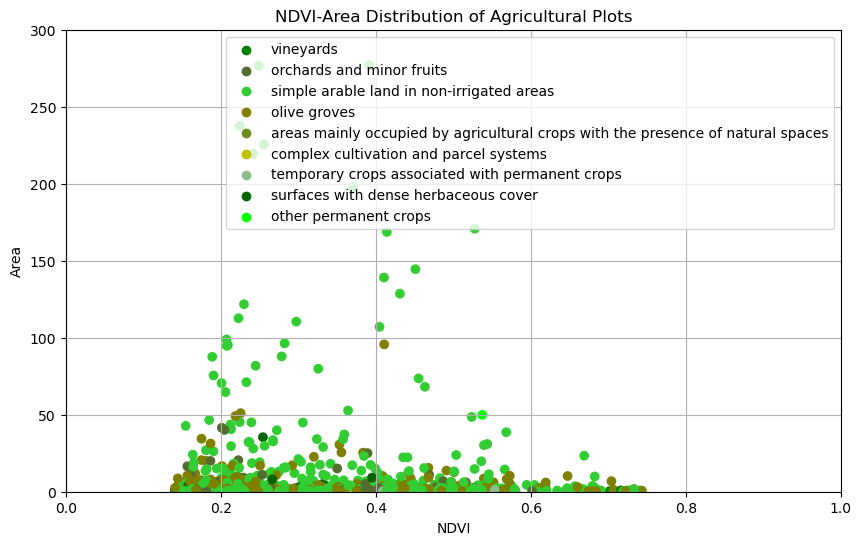

In [362]:
# Create a color map for management types
management_colors = {
    'vineyards': 'green',
    'orchards and minor fruits': 'darkolivegreen',
    'simple arable land in non-irrigated areas': 'limegreen',
    'olive groves': 'olive',
    'areas mainly occupied by agricultural crops with the presence of natural spaces': 'olivedrab',
    'complex cultivation and parcel systems': 'y',
    'temporary crops associated with permanent crops': 'darkseagreen',
    'surfaces with dense herbaceous cover': 'darkgreen',
    'other permanent crops': 'lime'
    # Add more management types and corresponding colors as needed
}

# Map management types to colors
lastjoin['Color'] = lastjoin['DESC_'].map(management_colors)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lastjoin['mean_ndvi'], lastjoin['Plot_ha'], c=lastjoin['Color'])

# Customize plot
plt.xlabel('NDVI')
plt.ylabel('Area')
plt.title('NDVI-Area Distribution of Agricultural Plots')

#Create a custom legend based on management types
for DESC_, color in management_colors.items():
    plt.scatter([], [], c=color, label=DESC_)  # Empty scatter points for legend

plt.legend()
plt.xlim(0, 1)
plt.ylim(0,300)
plt.grid(True)
plt.show()